In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-performance-in-exams/StudentsPerformance.csv


In [2]:
from matplotlib import pyplot as plt

In [3]:
exam = pd.read_csv("/kaggle/input/students-performance-in-exams/StudentsPerformance.csv")

In [4]:
exam

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [5]:
exam["Total score"] = exam["math score"] + exam["reading score"] + exam["writing score"]
exam

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282
996,male,group C,high school,free/reduced,none,62,55,55,172
997,female,group C,high school,free/reduced,completed,59,71,65,195
998,female,group D,some college,standard,completed,68,78,77,223


 # GROUP BY GENDER

In [6]:
Gender = exam.groupby(by="gender").mean()
Gender

,math score,reading score,writing score,Total score
gender,,,,
female,63.633205,72.608108,72.467181,208.708494
male,68.728216,65.473029,63.311203,197.512448


In [7]:
gender_grpd= Gender.index
math_grpd = Gender["math score"].values
read_grpd = Gender["reading score"].values
write_grpd = Gender["writing score"].values
total_grpd = Gender["Total score"].values

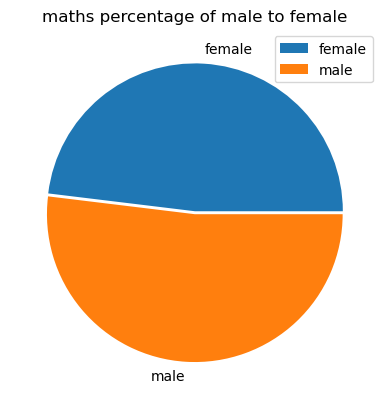

In [8]:
plt.pie(math_grpd,labels=gender_grpd,explode=[0.02, 0])

plt.title(label= "maths percentage of male to female")
plt.legend()
plt.show()

**Plotting the Gender categories **

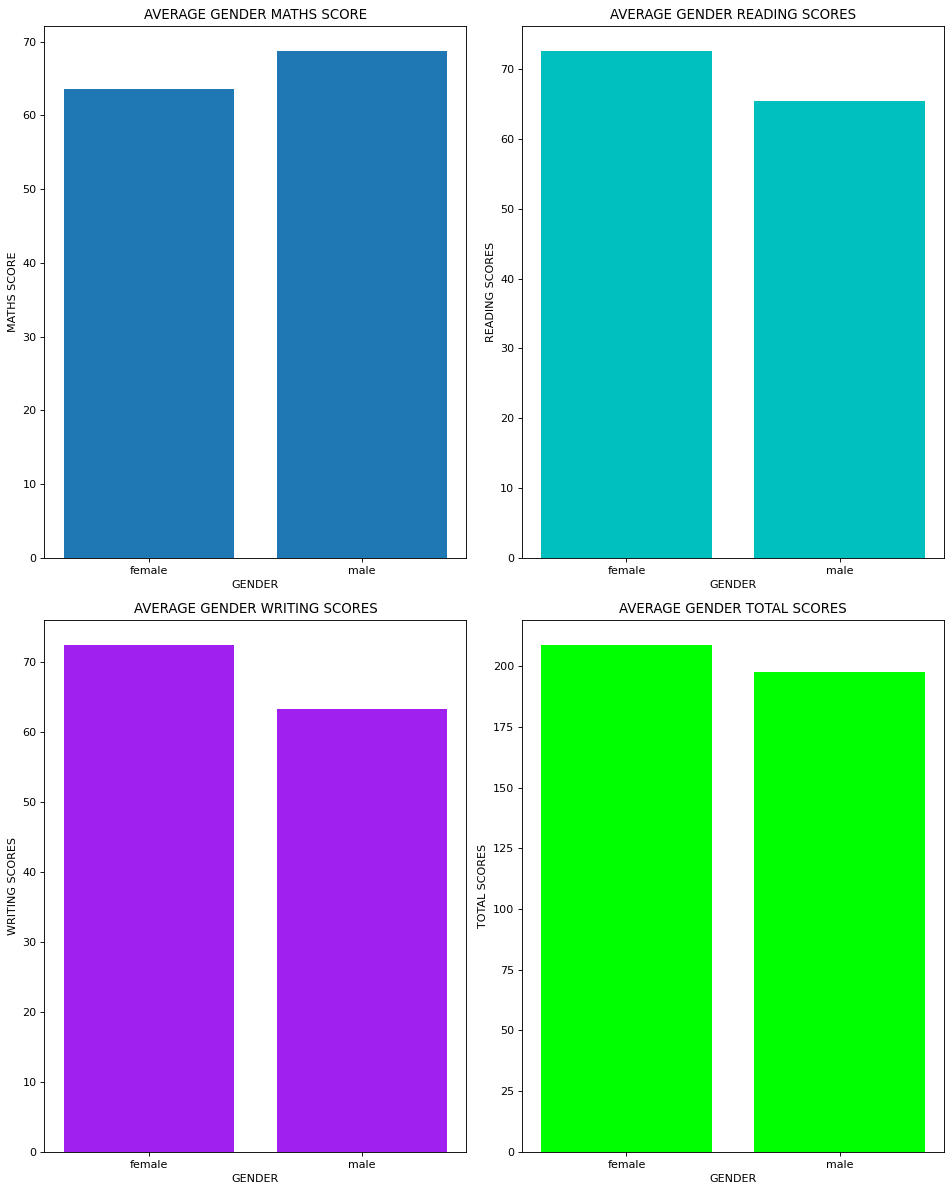

In [9]:
#MATHS PLOT
fig,ax1=plt.subplots(2,2,figsize=(12, 15), dpi=80)
ax1[0,0].bar(gender_grpd,math_grpd)
ax1[0,0].set_xlabel("GENDER")
ax1[0,0].set_ylabel("MATHS SCORE")
ax1[0,0].set_title("AVERAGE GENDER MATHS SCORE")

#READING PLOT
ax1[0,1].bar(gender_grpd,read_grpd,color="c")
ax1[0,1].set_xlabel("GENDER")
ax1[0,1].set_ylabel("READING SCORES")
ax1[0,1].set_title("AVERAGE GENDER READING SCORES")

#WRITING PLOT
ax1[1,0].bar(gender_grpd,write_grpd,color="#A020F0")
ax1[1,0].set_xlabel("GENDER")
ax1[1,0].set_ylabel("WRITING SCORES")
ax1[1,0].set_title("AVERAGE GENDER WRITING SCORES")

#TOTAL PLOT
ax1[1,1].bar(gender_grpd,total_grpd,color="#00FF00")
ax1[1,1].set_xlabel("GENDER")
ax1[1,1].set_ylabel("TOTAL SCORES")
ax1[1,1].set_title("AVERAGE GENDER TOTAL SCORES")


fig.tight_layout() 
fig.show()

# GROUP BY RACE


In [10]:
race = exam.groupby(by="race/ethnicity").mean()
race


,math score,reading score,writing score,Total score
race/ethnicity,,,,
group A,61.629213,64.674157,62.674157,188.977528
group B,63.452632,67.352632,65.600000,196.405263
group C,64.463950,69.103448,67.827586,201.394984
group D,67.362595,70.030534,70.145038,207.538168
group E,73.821429,73.028571,71.407143,218.257143


In [11]:
Race= race.index
math_grpd_race = race["math score"]
read_grpd_race = race["reading score"].values
write_grpd_race = race["writing score"].values
total_grpd_race = race["Total score"].values


**PLOTTING THE RACE CATEGORIES**

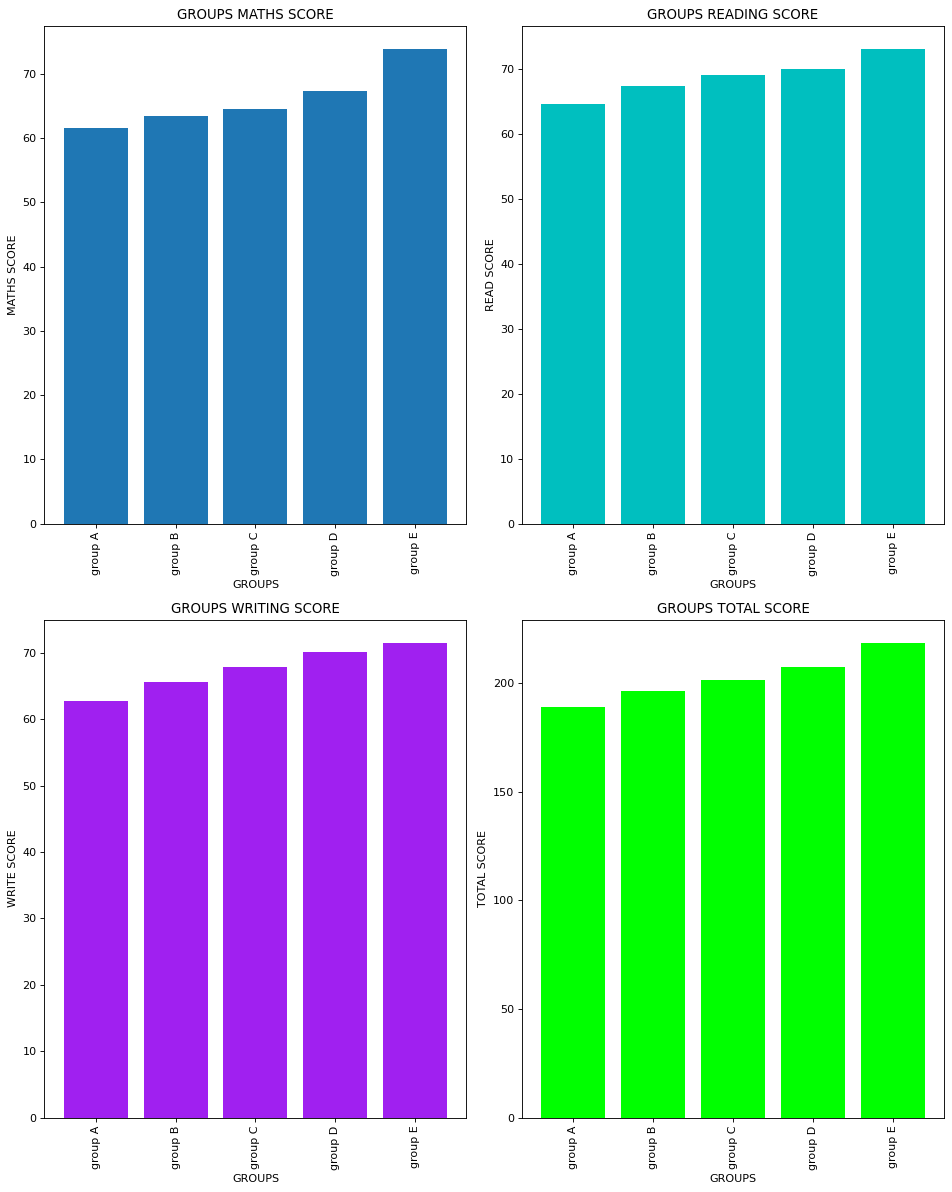

In [12]:
#GroupA PLOT
fig2,ax2=plt.subplots(2,2,figsize=(12, 15), dpi=80)
ax2[0,0].bar(Race,math_grpd_race)
ax2[0,0].set_xlabel("GROUPS")
ax2[0,0].set_ylabel("MATHS SCORE")
ax2[0,0].set_title("GROUPS MATHS SCORE")
ax2[0,0].tick_params(axis="x",rotation =90)


#GroupB PLOT
ax2[0,1].bar(Race,read_grpd_race,color="c")
ax2[0,1].set_xlabel("GROUPS")
ax2[0,1].set_ylabel("READ SCORE")
ax2[0,1].set_title("GROUPS READING SCORE")
ax2[0,1].tick_params(axis="x",rotation =90)

#GroupC PLOT
ax2[1,0].bar(Race,write_grpd_race,color="#A020F0")
ax2[1,0].set_xlabel("GROUPS")
ax2[1,0].set_ylabel("WRITE SCORE")
ax2[1,0].set_title("GROUPS WRITING SCORE")
ax2[1,0].tick_params(axis="x",rotation =90)

#GroupD PLOT
ax2[1,1].bar(Race,total_grpd_race,color="#00FF00")
ax2[1,1].set_xlabel("GROUPS")
ax2[1,1].set_ylabel("TOTAL SCORE")
ax2[1,1].set_title("GROUPS TOTAL SCORE")
ax2[1,1].tick_params(axis="x",rotation =90)





fig2.tight_layout() 
fig2.show()


# **GROUPING BY PARENTAL LEVEL OF EDUCATION(Ple)**

In [13]:
Ple = exam.groupby(by="parental level of education").mean()
Ple


,math score,reading score,writing score,Total score
parental level of education,,,,
associate's degree,67.882883,70.927928,69.896396,208.707207
bachelor's degree,69.389831,73.000000,73.381356,215.771186
high school,62.137755,64.704082,62.448980,189.290816
master's degree,69.745763,75.372881,75.677966,220.796610
some college,67.128319,69.460177,68.840708,205.429204
some high school,63.497207,66.938547,64.888268,195.324022


In [14]:
PLE = Ple.index
math_grpd_ple = Ple["math score"]
read_grpd_ple = Ple["reading score"].values
write_grpd_ple = Ple["writing score"].values
total_grpd_ple = Ple["Total score"].values


In [15]:
type(PLE)

pandas.core.indexes.base.Index

**PLOTTING THE PLE CATEGORIES**

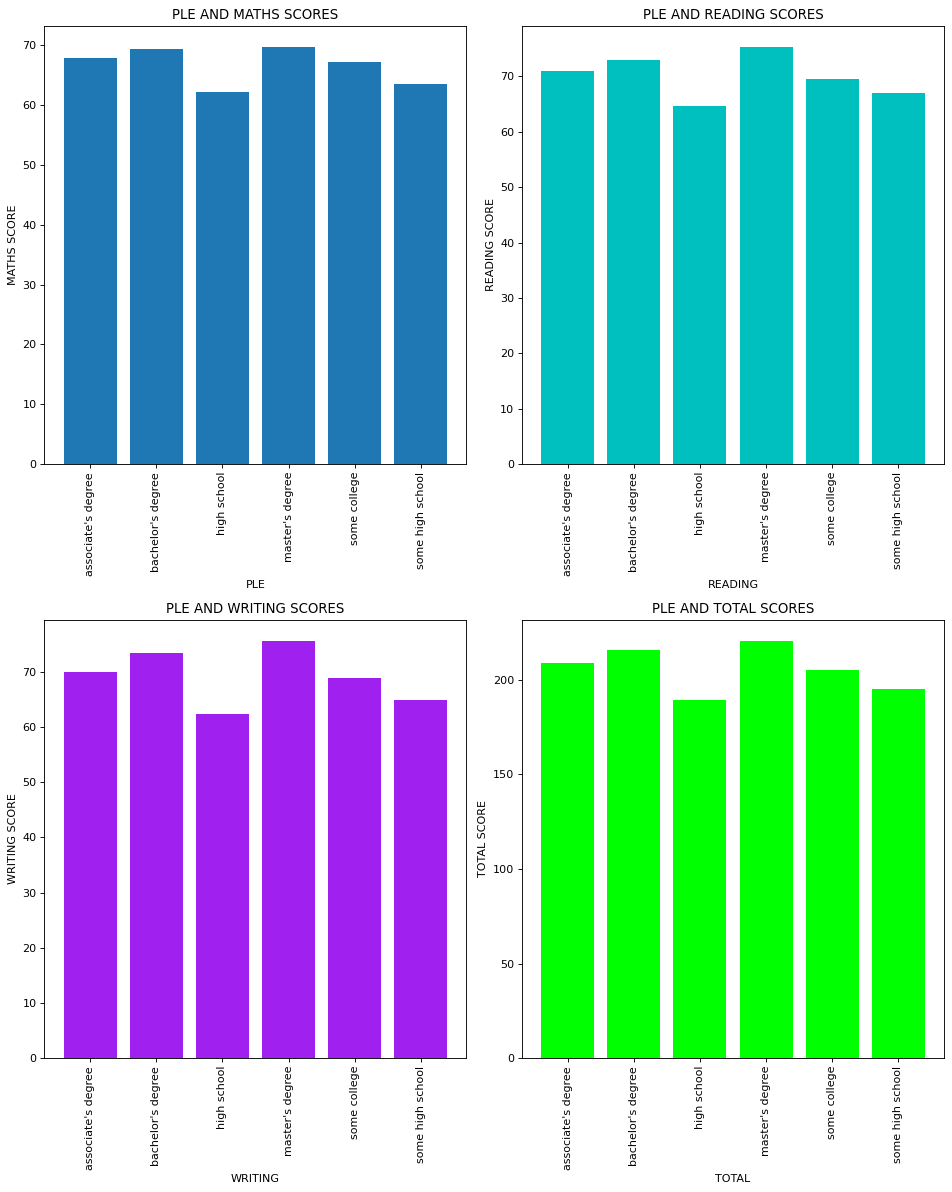

In [16]:
#PLE AND MATHS SCORES
fig3,ax3=plt.subplots(2,2,figsize=(12, 15), dpi=80)
ax3[0,0].bar(PLE,math_grpd_ple)
ax3[0,0].tick_params(axis="x",rotation =90)
ax3[0,0].set_ylabel("MATHS SCORE")
ax3[0,0].set_xlabel("PLE")
ax3[0,0].set_title("PLE AND MATHS SCORES")

ax3[0,1].bar(PLE,read_grpd_ple,color="c")
ax3[0,1].tick_params(axis="x",rotation =90)
ax3[0,1].set_ylabel("READING SCORE")
ax3[0,1].set_xlabel("READING")
ax3[0,1].set_title("PLE AND READING SCORES")

ax3[1,0].bar(PLE,write_grpd_ple,color="#A020F0")
ax3[1,0].tick_params(axis="x",rotation =90)
ax3[1,0].set_ylabel("WRITING SCORE")
ax3[1,0].set_xlabel("WRITING")
ax3[1,0].set_title("PLE AND WRITING SCORES")

ax3[1,1].bar(PLE,total_grpd_ple,color="#00FF00")
ax3[1,1].tick_params(axis="x",rotation =90)
ax3[1,1].set_ylabel("TOTAL SCORE")
ax3[1,1].set_xlabel("TOTAL")
ax3[1,1].set_title("PLE AND TOTAL SCORES")






fig3.tight_layout() 
fig3.show()


# LUNCH RELATIONSHIP WITH PERFORMANCE

In [17]:
lunch = exam.groupby(exam["lunch"]).mean()
lunch

,math score,reading score,writing score,Total score
lunch,,,,
free/reduced,58.921127,64.653521,63.022535,186.597183
standard,70.034109,71.654264,70.823256,212.511628


In [18]:
LUNCH= lunch.index
math_grpd_lunch = lunch["math score"].values
read_grpd_lunch = lunch["reading score"].values
write_grpd_lunch = lunch["writing score"].values
total_grpd_lunch = lunch["Total score"].values

myexplode = [0.05,0]


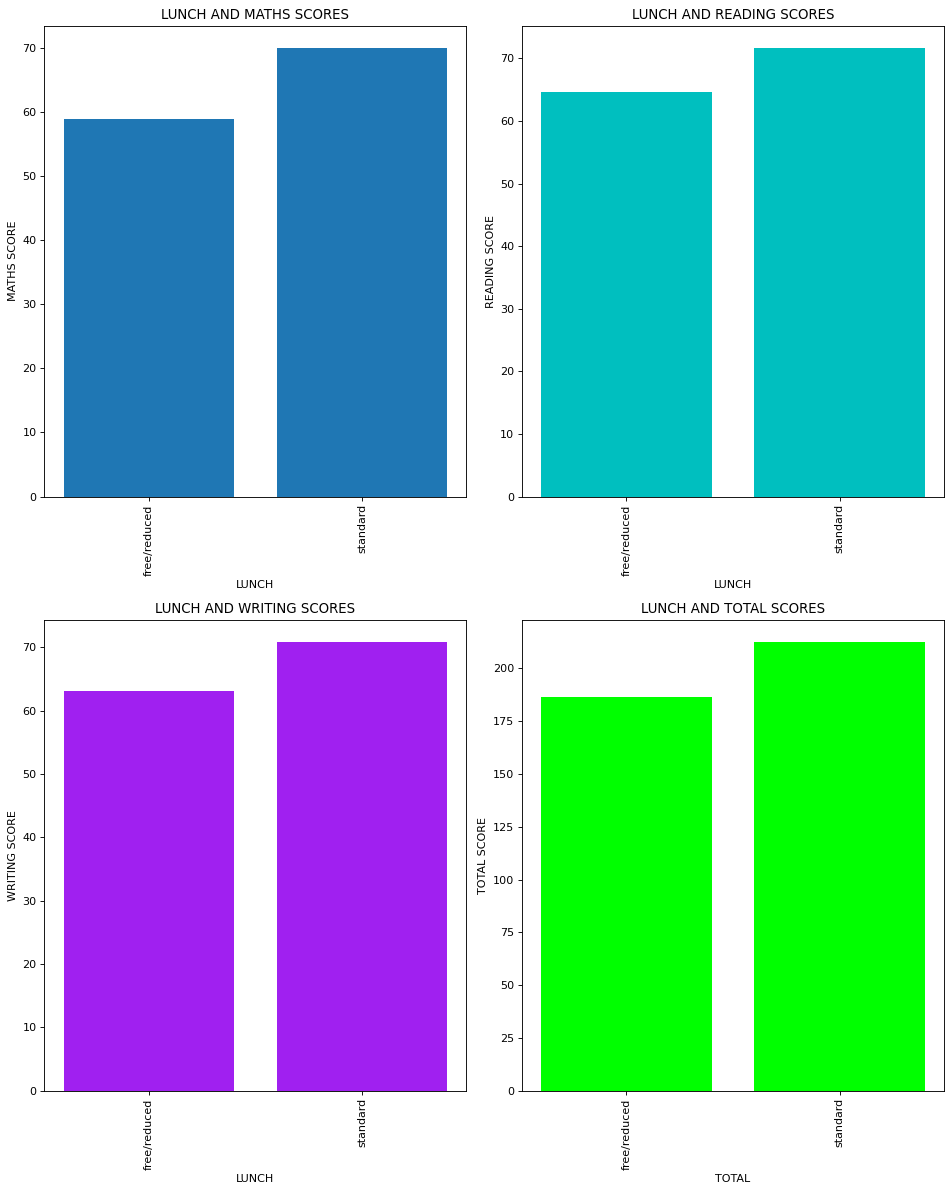

In [19]:
#LUNCH AND MATHS SCORES
fig4,ax4=plt.subplots(2,2,figsize=(12, 15), dpi=80)
ax4[0,0].bar(LUNCH,math_grpd_lunch)
ax4[0,0].tick_params(axis="x",rotation =90)
ax4[0,0].set_ylabel("MATHS SCORE")
ax4[0,0].set_xlabel("LUNCH")
ax4[0,0].set_title("LUNCH AND MATHS SCORES")

#LUNCH AND READING SCORES
ax4[0,1].bar(LUNCH,read_grpd_lunch,color="c")
ax4[0,1].tick_params(axis="x",rotation =90)
ax4[0,1].set_ylabel("READING SCORE")
ax4[0,1].set_xlabel("LUNCH")
ax4[0,1].set_title("LUNCH AND READING SCORES")

#LUNCH AND WRITING SCORES
ax4[1,0].bar(LUNCH,write_grpd_lunch,color="#A020F0")
ax4[1,0].tick_params(axis="x",rotation =90)
ax4[1,0].set_ylabel("WRITING SCORE")
ax4[1,0].set_xlabel("LUNCH")
ax4[1,0].set_title("LUNCH AND WRITING SCORES")


ax4[1,1].bar(LUNCH,total_grpd_lunch,color="#00FF00")
ax4[1,1].tick_params(axis="x",rotation =90)
ax4[1,1].set_ylabel("TOTAL SCORE")
ax4[1,1].set_xlabel("TOTAL")
ax4[1,1].set_title("LUNCH AND TOTAL SCORES")




fig4.tight_layout() 
fig4.show()

How effective is the test preparation course?

**Test preparation course and its effectiveness**(TPC)

In [20]:
TPC= exam.groupby(exam["test preparation course"]).mean()
Tpc=TPC.index
math_grpd_TPC = TPC["math score"].values
read_grpd_TPC = TPC["reading score"].values
write_grpd_TPC = TPC["writing score"].values
total_grpd_TPC = TPC["Total score"].values
myexplode = [0.05,0]


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
IT IS OBSERVED THAT THOSE THAT  PARTAKE IN THE TEST PREPARATION COURSE PERFORMED BETTER THAN THOSE THAT DID NOT
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


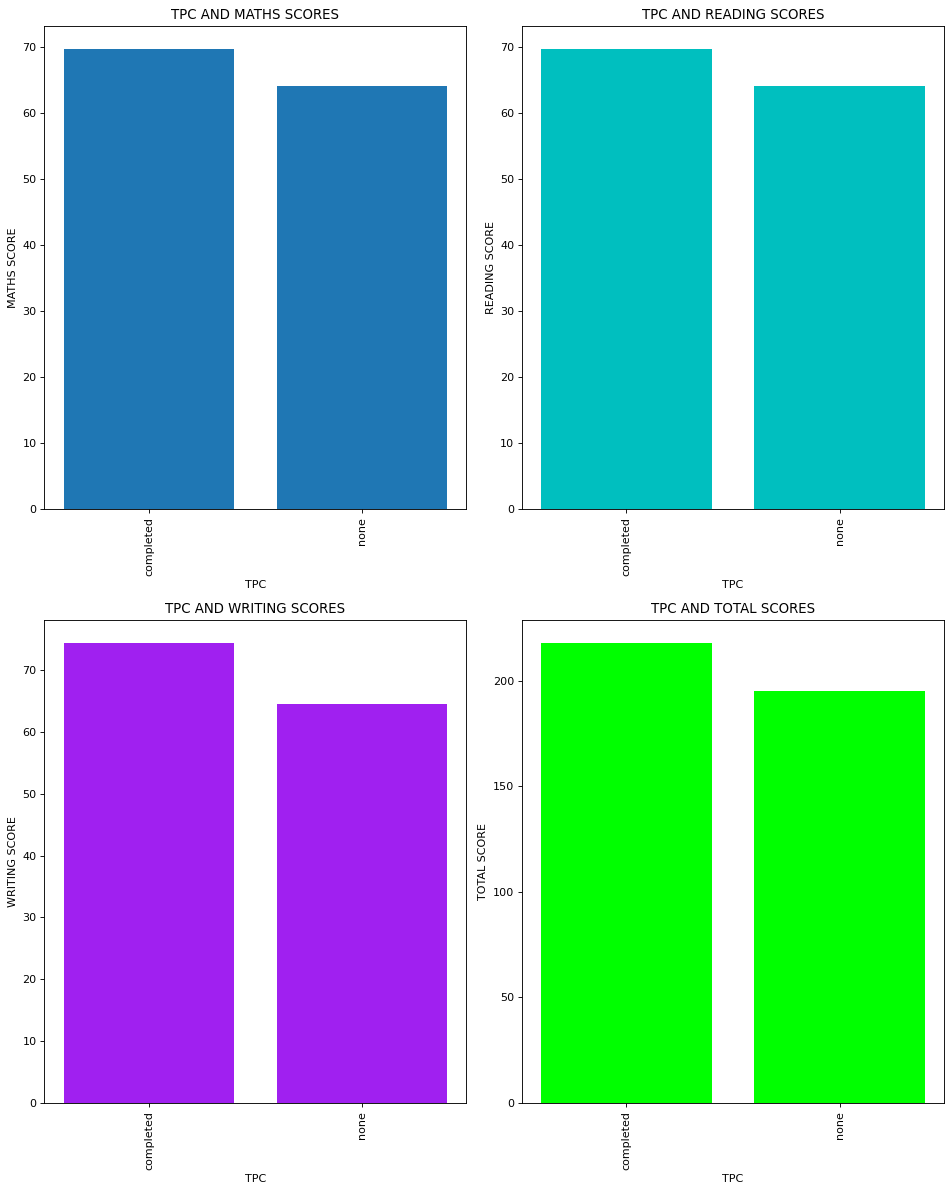

In [21]:
#TPC AND MATHS SCORES
fig5,ax5=plt.subplots(2,2,figsize=(12, 15), dpi=80)
ax5[0,0].bar(Tpc,math_grpd_TPC)
ax5[0,0].tick_params(axis="x",rotation =90)
ax5[0,0].set_ylabel("MATHS SCORE")
ax5[0,0].set_xlabel("TPC")
ax5[0,0].set_title("TPC AND MATHS SCORES")

#TPC AND READING SCORES
ax5[0,1].bar(Tpc,math_grpd_TPC,color="c")
ax5[0,1].tick_params(axis="x",rotation =90)
ax5[0,1].set_ylabel("READING SCORE")
ax5[0,1].set_xlabel("TPC")
ax5[0,1].set_title("TPC AND READING SCORES")

#TPC AND WRITING SCORES
ax5[1,0].bar(Tpc,write_grpd_TPC,color="#A020F0")
ax5[1,0].tick_params(axis="x",rotation =90)
ax5[1,0].set_ylabel("WRITING SCORE")
ax5[1,0].set_xlabel("TPC")
ax5[1,0].set_title("TPC AND WRITING SCORES")


ax5[1,1].bar(Tpc,total_grpd_TPC,color="#00FF00")
ax5[1,1].tick_params(axis="x",rotation =90)
ax5[1,1].set_ylabel("TOTAL SCORE")
ax5[1,1].set_xlabel("TPC")
ax5[1,1].set_title("TPC AND TOTAL SCORES")






fig5.tight_layout() 
fig5.show()
print("")
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
print("IT IS OBSERVED THAT THOSE THAT  PARTAKE IN THE TEST PREPARATION COURSE PERFORMED BETTER THAN THOSE THAT DID NOT")
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

RELATIONSHIPS BETWEEN THE TOTAL VALUES IN EACH CATEGORY

In [22]:
Total_1=total_grpd_race 
Total_2 = total_grpd
Total_3= total_grpd_TPC 
Total_4= total_grpd_lunch 
Total_5= total_grpd_ple
